Kyle Shannon - 22 NOV 2015


I decided to use the 2<sup>nd</sup> version dataset [with extra data points and variables] to complete this project.

### Section 0: References

Reference | Description
--- | ---
xyz | haa

### Section 1: Statistical Test

#### 1.1 Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?

Subjects will have longer reaction times when accurately reading through a list of incongruent words versus accurately reading through a list of congruent words. Formally:

-  H<sub>0</sub>: &mu;<sub>congruent</sub> = &mu;<sub>incongruent</sub> 
-  H<sub>a</sub>: &mu;<sub>congruent</sub> < &mu;<sub>incongruent</sub> 

The null hypothesis states that population mean reaction times for the Stroop Effect's Congruent and Incongruent tasks are approximatley equal. The alternative hypothesis states that mean population reactions times for the Congruent task is smaller than for the Incongruent task. 

### Relevant Code:

In [2]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats
import sklearn
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv('turnstile_weather_v2.csv')

In [18]:
df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


In [17]:
print df['rain'].value_counts()

0    33064
1     9585
dtype: int64


In [46]:
df_no_ENTRIESn_hourly_outliers = df[df['ENTRIESn_hourly']<=10000]

In [47]:
df_no_ENTRIESn_hourly_outliers.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.147500e+04,4.147500e+04,41475.000000,41475.000000,41475.000000,41475.000000,41475.000000,41475.000000,41475.000000,41475.000000,...,41475.000000,41475.000000,41475.000000,41475.000000,41475.000000,41475.000000,41475.000000,41475.000000,41475.000000,41475.000000
mean,2.595011e+07,1.852520e+07,1514.702592,1204.138831,9.883448,2.924822,0.708186,40.724110,-73.939741,0.009934,...,29.971516,0.223436,63.089049,6.922708,0.004558,29.971180,63.121528,6.938496,40.728251,-73.937997
std,2.702454e+07,1.830657e+07,1786.091415,1880.981572,6.898951,2.088506,0.454603,0.072449,0.059682,0.099173,...,0.138699,0.416553,8.467649,4.518563,0.016208,0.131697,6.948955,3.183465,0.066163,0.059508
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.013106e+07,7.578810e+06,261.000000,228.000000,4.000000,1.000000,0.000000,40.675382,-73.987169,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.793086e+07,1.301770e+07,860.000000,635.000000,12.000000,3.000000,1.000000,40.715436,-73.952386,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.957500,61.050000,6.166667,40.720570,-73.949150
75%,3.120625e+07,2.225534e+07,2071.500000,1427.000000,16.000000,5.000000,1.000000,40.759123,-73.905501,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,68.080000,8.980000,40.755226,-73.912033
max,2.357746e+08,1.482644e+08,10000.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


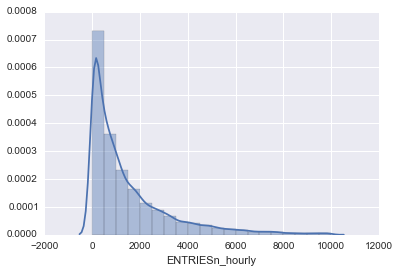

In [52]:
sns.distplot(df_no_ENTRIESn_hourly_outliers['ENTRIESn_hourly'][df_no_ENTRIESn_hourly_outliers['rain']==0], bins=range(0,10001,500))

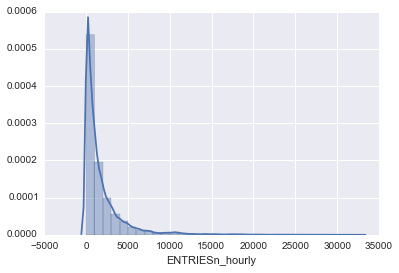

In [37]:
sns.distplot(df['ENTRIESn_hourly'][df['rain']==0], bins=range(0,15001,1000))

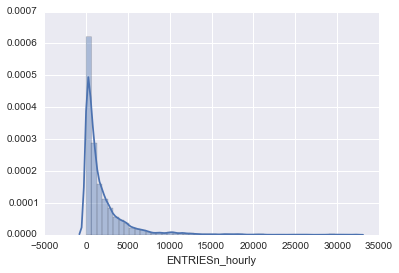

In [10]:
sns.distplot(df['ENTRIESn_hourly'][df['rain']==1])

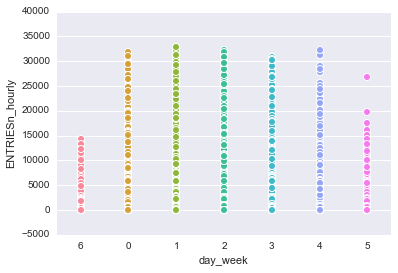

In [16]:
sns.stripplot(x="day_week", y="ENTRIESn_hourly", data=df)

In [54]:
scipy.stats.shapiro(df['ENTRIESn_hourly'][df['rain']==1])

C:\Users\kyle\Anaconda\lib\site-packages\scipy\stats\morestats.py:1082: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.5938820838928223, 0.0)

In [ ]:
|